# Проект по обработке и визуализации данных

## Обзор
Оценка корректности отображения рейтингов онлайн платформы Fandango, которая занимается рейтингами и отзывами, также зарабатывает на продаже билетов на фильмы. 
Выявление проблемы: есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?


### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Необходимо определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

---

## Исследование Данных


**Прочтите эту статью, по мотивам которой строится проект: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----

----

#### fandango_scape.csv
Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [32]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [33]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Изучим связь между популярностью фильма и его рейтингом. Нарисуем график scatterplot, показывающий связь между колонками RATING и VOTES.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

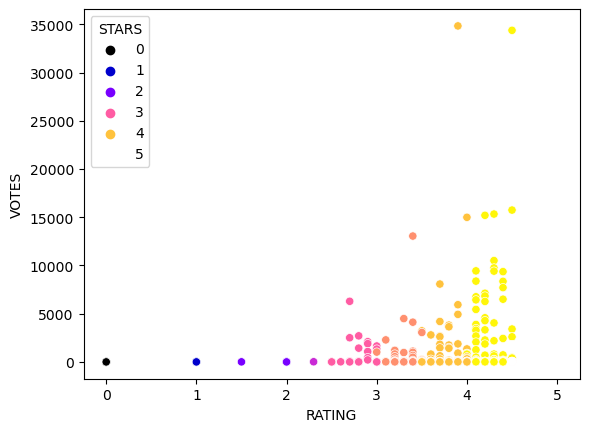

In [34]:
sns.scatterplot(data = fandango, 
                x = 'RATING', 
                y = 'VOTES', 
                hue = 'STARS', 
                palette = 'gnuplot2')


**Вычисление корреляции между колонками:**

In [35]:
fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
    
**Создадим новую колонку, в ней возьмем из строки FILM только год, и назовите эту новую колонку YEAR**

In [36]:
fandango['YEAR'] = np.vectorize(lambda x: x.split(' ')[-1][1:-1])(fandango['FILM'])
fandango['YEAR'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: YEAR, dtype: object

**Количество фильмов в наборе данных Fandango, в разбивке по годам?**

In [37]:
films_by_year = fandango['YEAR'].value_counts()
films_by_year

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**ЗАДАНИЕ: Визуализируйте количество фильмов в год с помощью графика:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

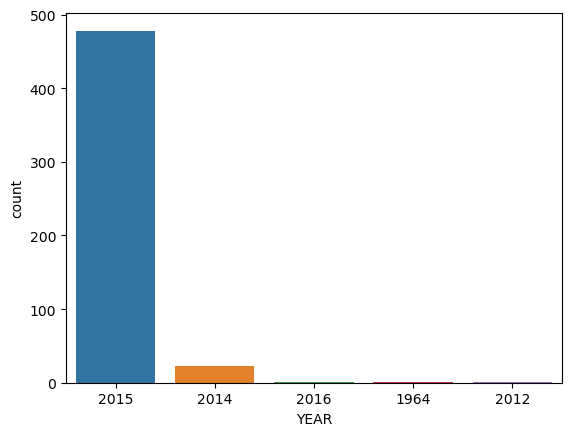

In [38]:
sns.countplot(data = fandango, 
              x = 'YEAR')


**Найдем 10 фильмов, которые получили наибольшее количество голосов (votes)?**

In [39]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Найдем сколько фильмов имеет нулевое количество голосов (votes)**

In [40]:
fandango[fandango['VOTES'] == 0].count()[0]

69

**Создадим DataFrame только с теми фильмами, которые имеют голоса (votes) - то есть, удалим те фильмы, у которых нет ни одного голоса.**

In [41]:
df = fandango[fandango['VOTES'] > 0]
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Визуализируем эту разницу распределений.**

**Создадим график KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING). Обрежьте диапазон KDE в пределах 0-5.**

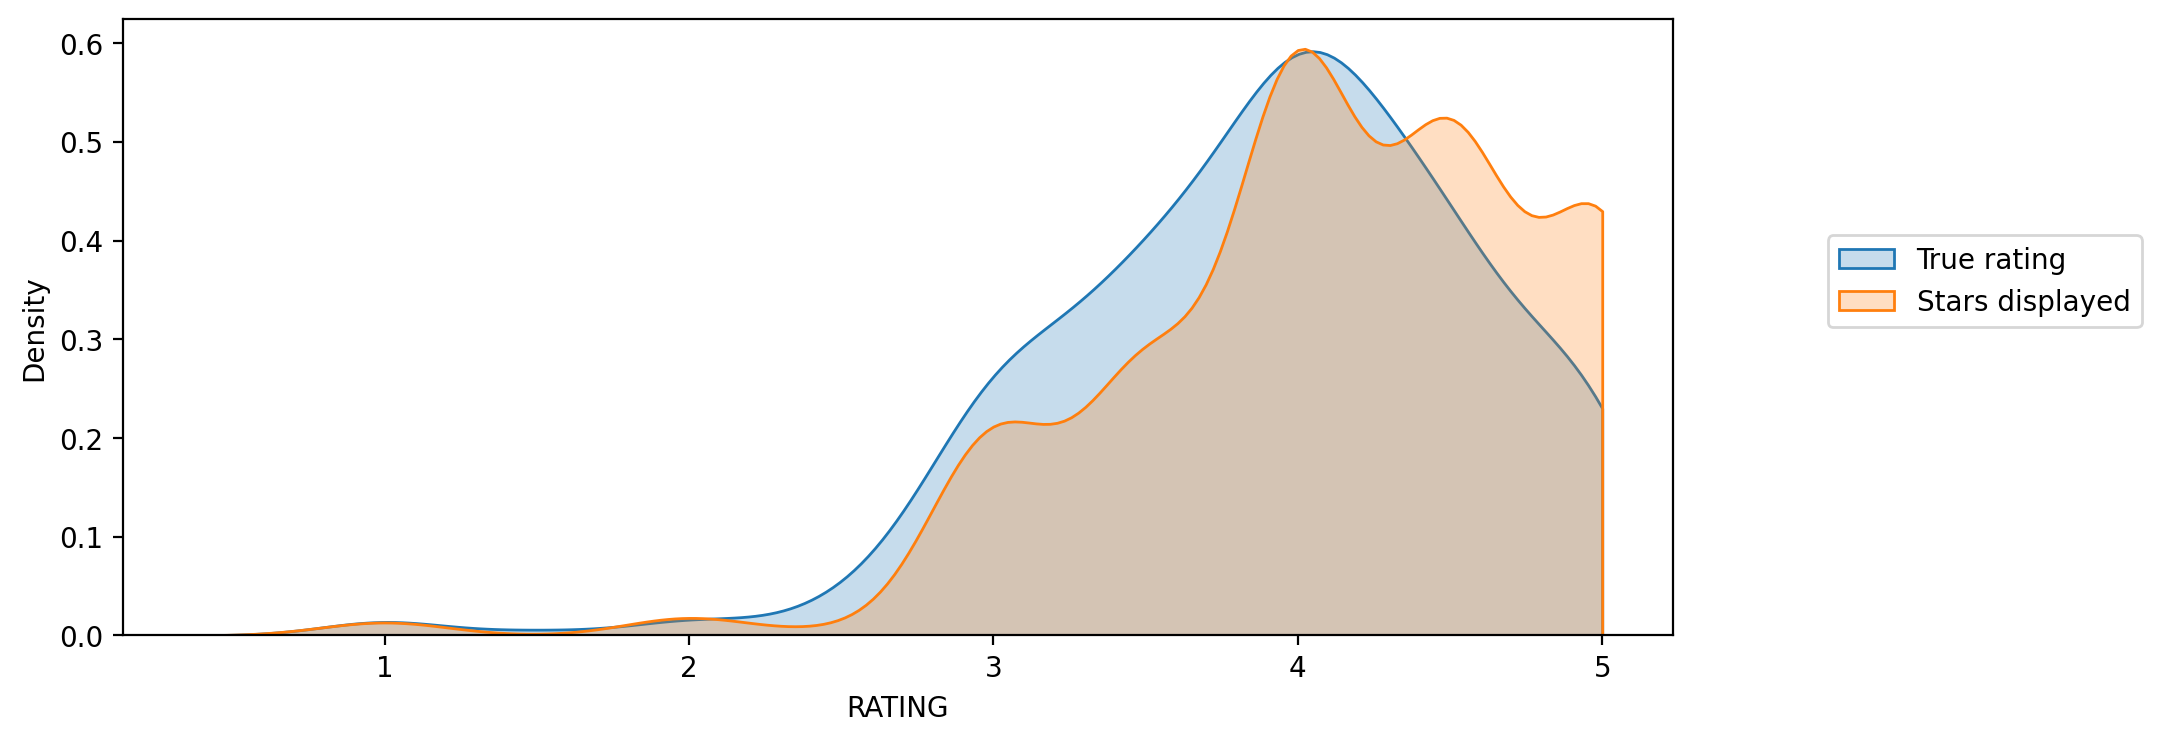

In [42]:
plt.figure(figsize = (10, 4), dpi = 200)

sns.kdeplot(data = df, 
            x = 'RATING', 
            clip=[0,5], 
            palette = 'crest', 
            fill=True, 
            label = 'True rating')

sns.kdeplot(data = df, 
            x = 'STARS', 
            clip=[0,5], 
            palette = 'crest', 
            fill=True, 
            label = 'Stars displayed')

plt.legend(loc = (1.1, 0.5))

**Посчитаем эту разницу в численном виде; Создаем новую колонку, в которой сохраним разницу между колонками STARS и RATING с помощью обычного вычитания STARS-RATING, а также выполним округление до одной десятичной цифры после запятой.**

In [43]:
df['differences'] = round(df['STARS'] - df['RATING'], 2)
df

/Users/nikita/anaconda3/envs/ML_course/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FILM,STARS,RATING,VOTES,YEAR,differences
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Нарисуем график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

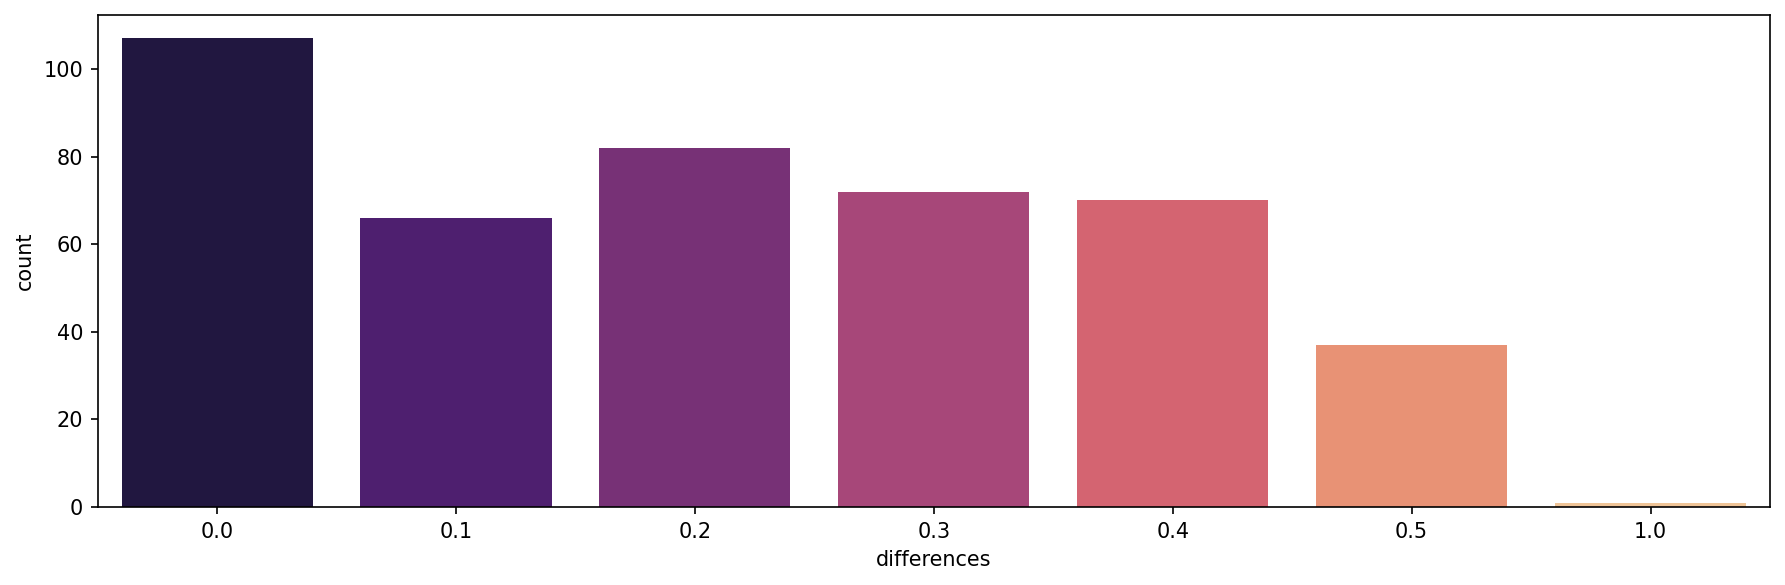

In [44]:
plt.figure(figsize = (12, 4), dpi = 150)
sns.countplot(data = df, 
              x = 'differences', 
              palette = 'magma')
plt.tight_layout()
plt.show()

**На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом! Найдите этот фильм.**

In [45]:
df[df['differences'] == 1]


,FILM,STARS,RATING,VOTES,YEAR,differences
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

**Выполним ячейку ниже, чтобы загрузить файл "all_sites_scores.csv"**

In [46]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


**Изучим общие свойства полученного объекта DataFrame.**

In [47]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [48]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**Нарисуем график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

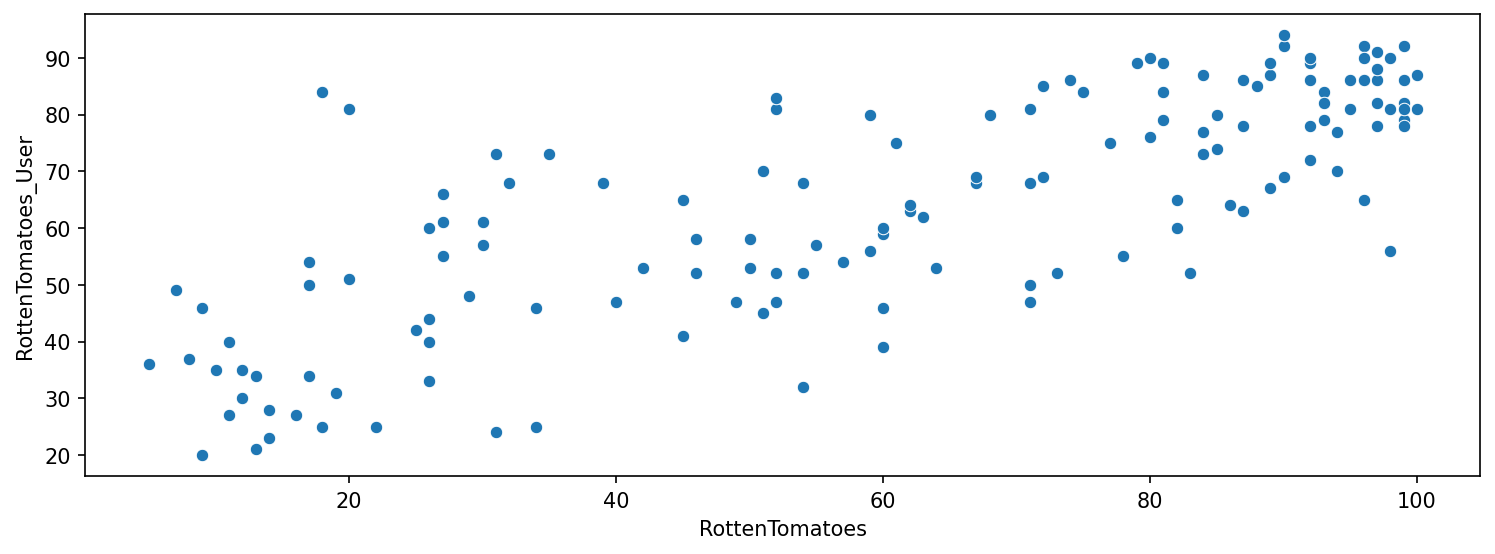

In [49]:
plt.figure(figsize=(12, 4), dpi = 150)
sns.scatterplot(data = all_sites, 
                x = 'RottenTomatoes', 
                y = 'RottenTomatoes_User', 
                palette = 'veridis')

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

**Создадим новую колонку, в которой сохраним разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes. Используйте формулу RottenTomatoes-RottenTomatoes_User.**

In [50]:
all_sites['delta'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['delta'].head()

0   -12
1     5
2   -10
3   -66
4   -14
Name: delta, dtype: int64

Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

**Вычислим среднюю абсолютную разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes, согласно описанию выше.**

In [51]:
round(all_sites['delta'].apply(lambda x: abs(x)).mean(), 0 )

15.0

**Нарисуем график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения. Для отображения этого распределения можете использовать как KDE, так и гистограммы.**

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

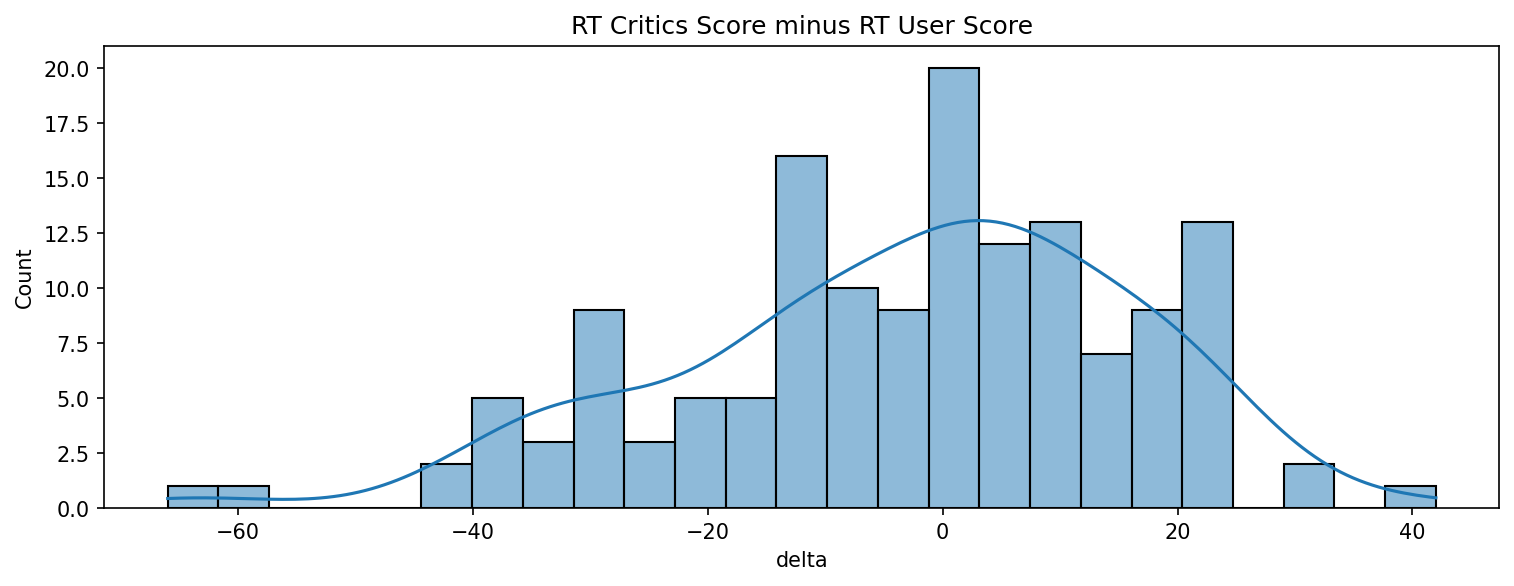

In [52]:
plt.figure(figsize = (12, 4), dpi = 150)
sns.histplot(data = all_sites, 
             x = 'delta', 
             kde = True,
             bins = 25)
plt.title('RT Critics Score minus RT User Score')

**Далее нарисуем график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

<AxesSubplot:xlabel='delta', ylabel='Count'>

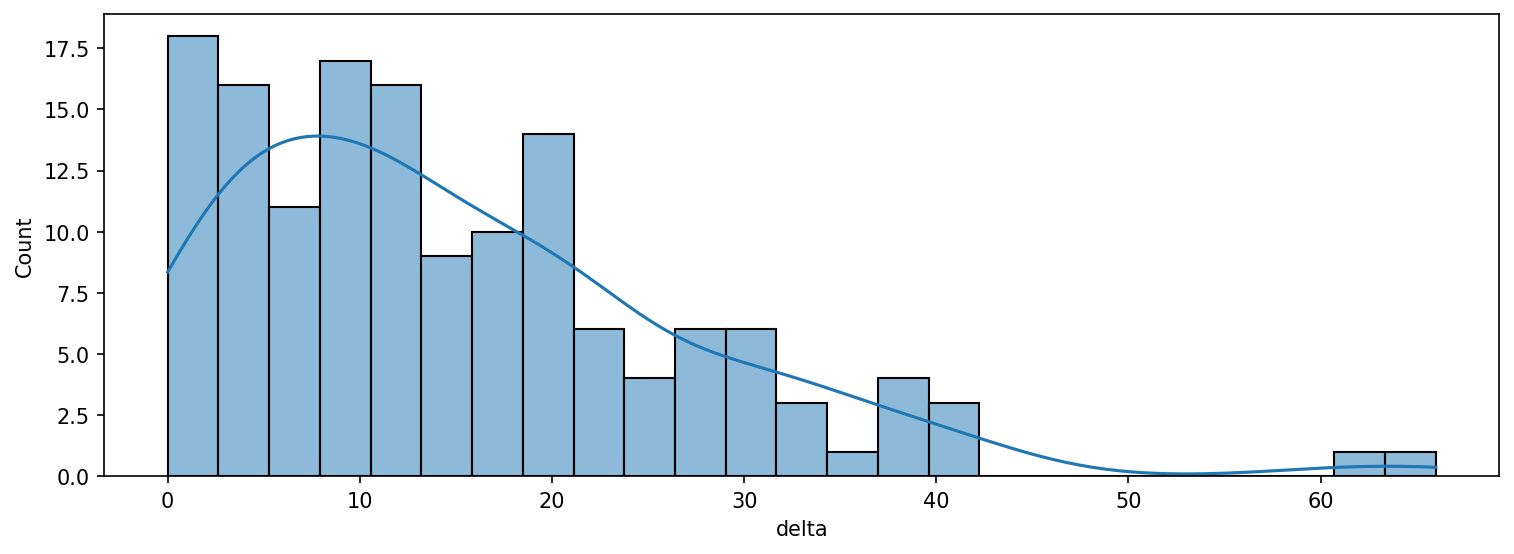

In [53]:
plt.figure(figsize = (12, 4), dpi = 150)
sns.histplot(data = all_sites, 
             x = round(all_sites['delta'].apply(lambda x: abs(x)), 2), 
             kde = True,
             bins = 25)


**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**5 фильмов, которые в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [54]:
#Users love, but critics hate
all_sites.nsmallest(5, 'delta')[['FILM', 'delta']]

,FILM,delta
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Далее наоборот - отобразим 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [55]:
#Critics love, but users hate
all_sites.nlargest(5, 'delta')[['FILM', 'delta']]

,FILM,delta
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**Нарисуем график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

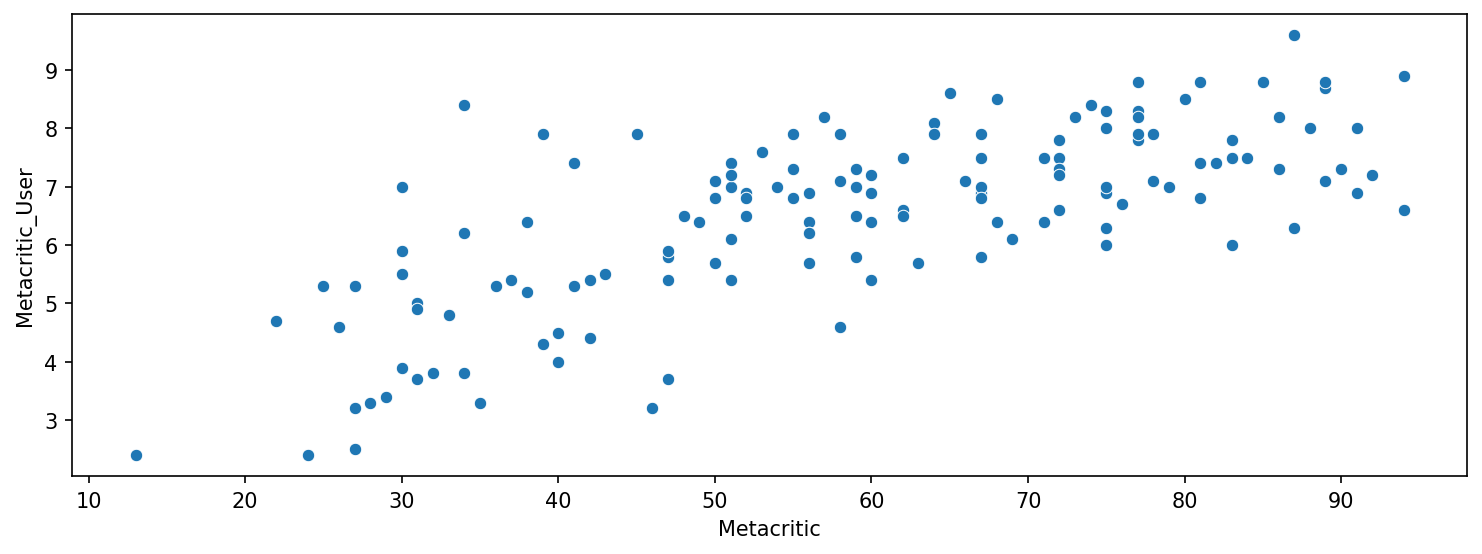

In [56]:
plt.figure(figsize = (12, 4), dpi = 150)
sns.scatterplot(data = all_sites, 
                x = 'Metacritic', 
                y = 'Metacritic_User')

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**Нарисуем график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

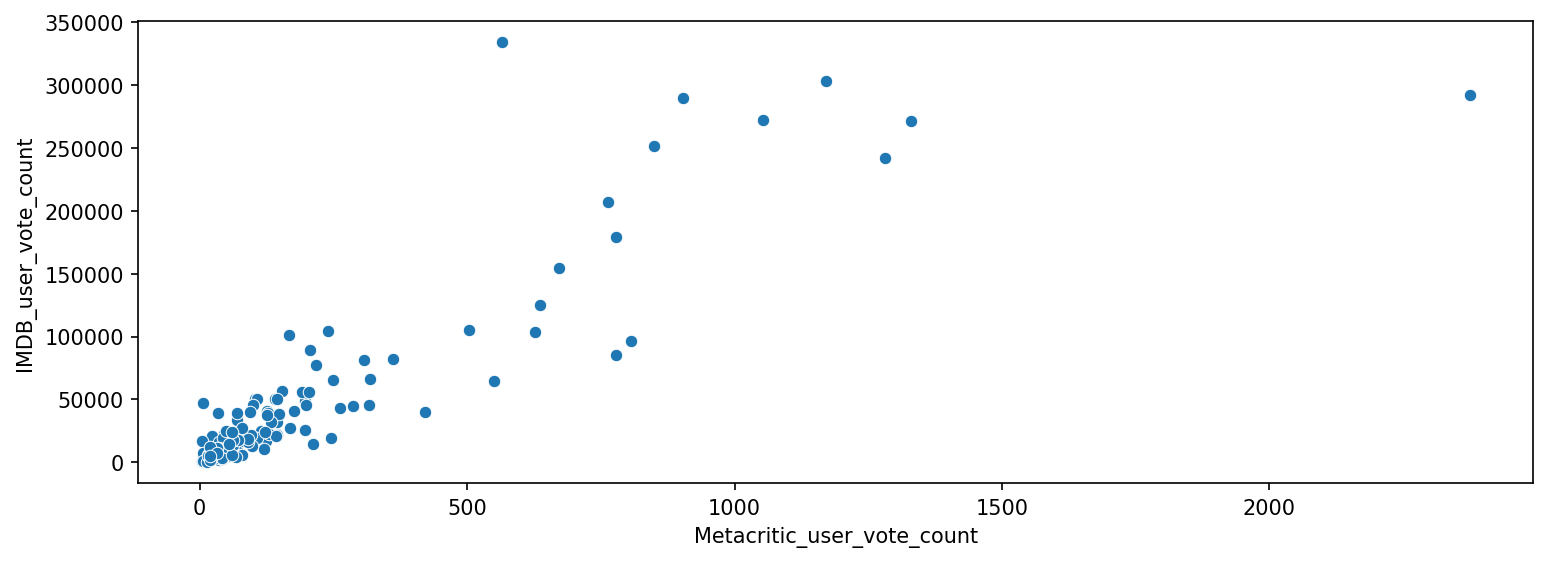

In [57]:
plt.figure(figsize = (12, 4), dpi = 150)
sns.scatterplot(data = all_sites, 
                x = 'Metacritic_user_vote_count', 
                y = 'IMDB_user_vote_count')

**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Найдем один фильм, который получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic**

**Узнаем Какой фильм получил наибольшее количество голосов на IMDB**

In [58]:
all_sites[(all_sites['IMDB_user_vote_count'] > 300_000) & (all_sites['Metacritic_user_vote_count'] < 700)]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,delta
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Узнаем какой фильм получил наибольшее количество голосов на Metacritic**

In [59]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,delta
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Объединим таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделаем объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

In [60]:
merge_df = fandango.merge(all_sites, how = 'inner', on = 'FILM')
merge_df['YEAR'] = np.vectorize(lambda x: x.split(' ')[-1][1:-1])(merge_df['FILM'])
merge_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,delta
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [61]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  delta                       145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Обратитм внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

**Добавим дополнительные колонки в all_sites, и запишите в них нормализованные значения рейтингов от 0 до 5**

В качестве подсказки, можете прочитать вот эту статью: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


In [62]:
merge_df[['RT_Norm', 'RTU_Norm', 'Meta_Norm']] = np.vectorize(lambda x: round(x / 20, 1))(merge_df[['RottenTomatoes', 'RottenTomatoes_User', 'Metacritic']])
merge_df[['Meta_U_Norm', 'IMDB_Norm']] = np.vectorize(lambda x: round(x / 2, 1))(merge_df[['Metacritic_User', 'IMDB']])

In [63]:
merge_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,delta,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.5,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.5,4.3


**Далее создадим DataFrame с названием norm_scores, в котором оставьте только нормализованные рейтинги. Также оставим колонки STARS и RATING из исходной таблицы fandango.**

In [64]:
norm_scores = merge_df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.5,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.5,4.3


### Сравнение распределений рейтингов от разных компаний

Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**Нарисуем график, сравнивающий распределения нормализованных рейтингов от всех компаний. Это можно сделать разными способами, но попробуйте использовать Seaborn KDEplot**

Если Вам нужно переместить легенду на графике seaborn kdeplot, то это можно сделать вот так: https://github.com/mwaskom/seaborn/issues/2280

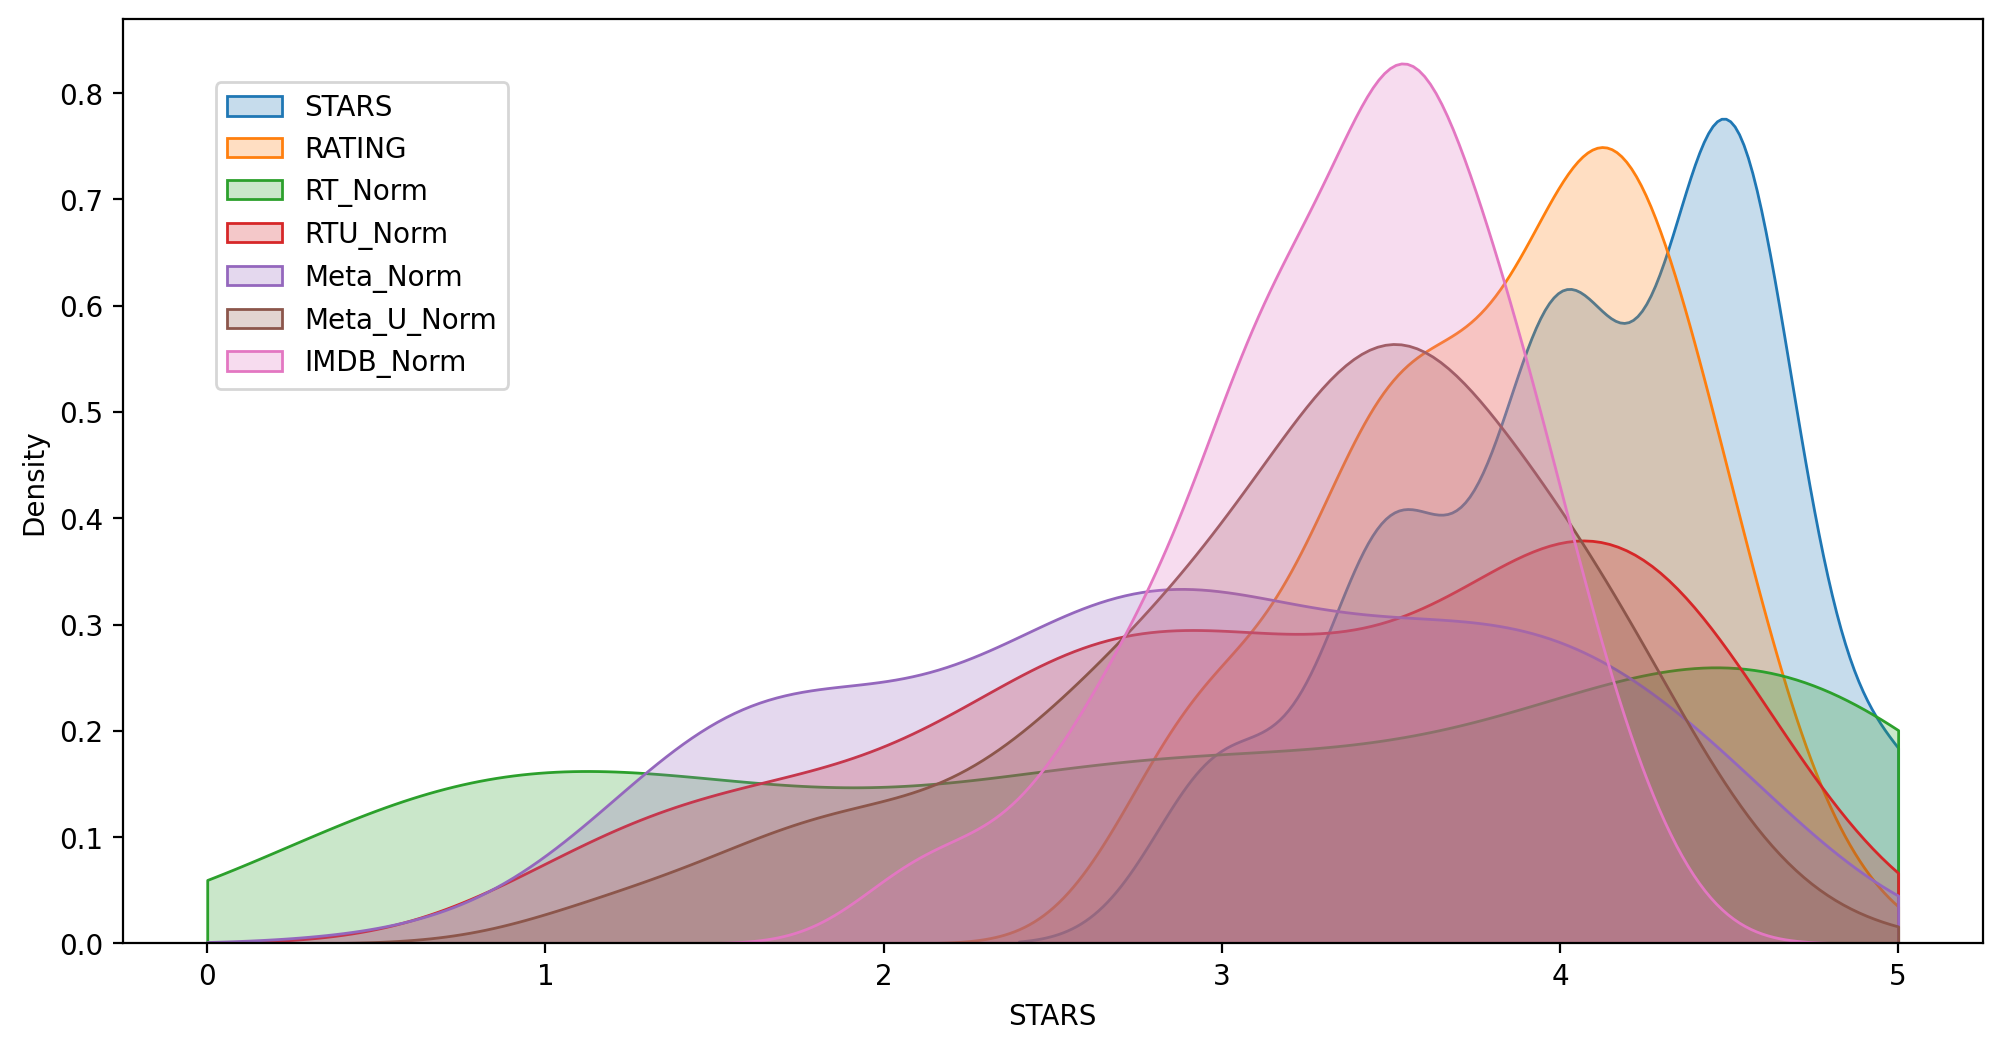

In [65]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.kdeplot(data = norm_scores, x = 'STARS', clip=[0,5], palette = 'crest', fill=True, label = 'STARS')
sns.kdeplot(data = norm_scores, x = 'RATING', clip=[0,5], palette = 'crest', fill=True, label = 'RATING')
sns.kdeplot(data = norm_scores, x = 'RT_Norm', clip=[0,5], palette = 'crest', fill=True, label = 'RT_Norm')
sns.kdeplot(data = norm_scores, x = 'RTU_Norm', clip=[0,5], palette = 'crest', fill=True, label = 'RTU_Norm')
sns.kdeplot(data = norm_scores, x = 'Meta_Norm', clip=[0,5], palette = 'crest', fill=True, label = 'Meta_Norm')
sns.kdeplot(data = norm_scores, x = 'Meta_U_Norm', clip=[0,5], palette = 'crest', fill=True, label = 'Meta_U_Norm')
sns.kdeplot(data = norm_scores, x = 'IMDB_Norm', clip=[0,5], palette = 'crest', fill=True, label = 'IMDB_Norm')
plt.legend(loc = (0.05, 0.6))

No handles with labels found to put in legend.


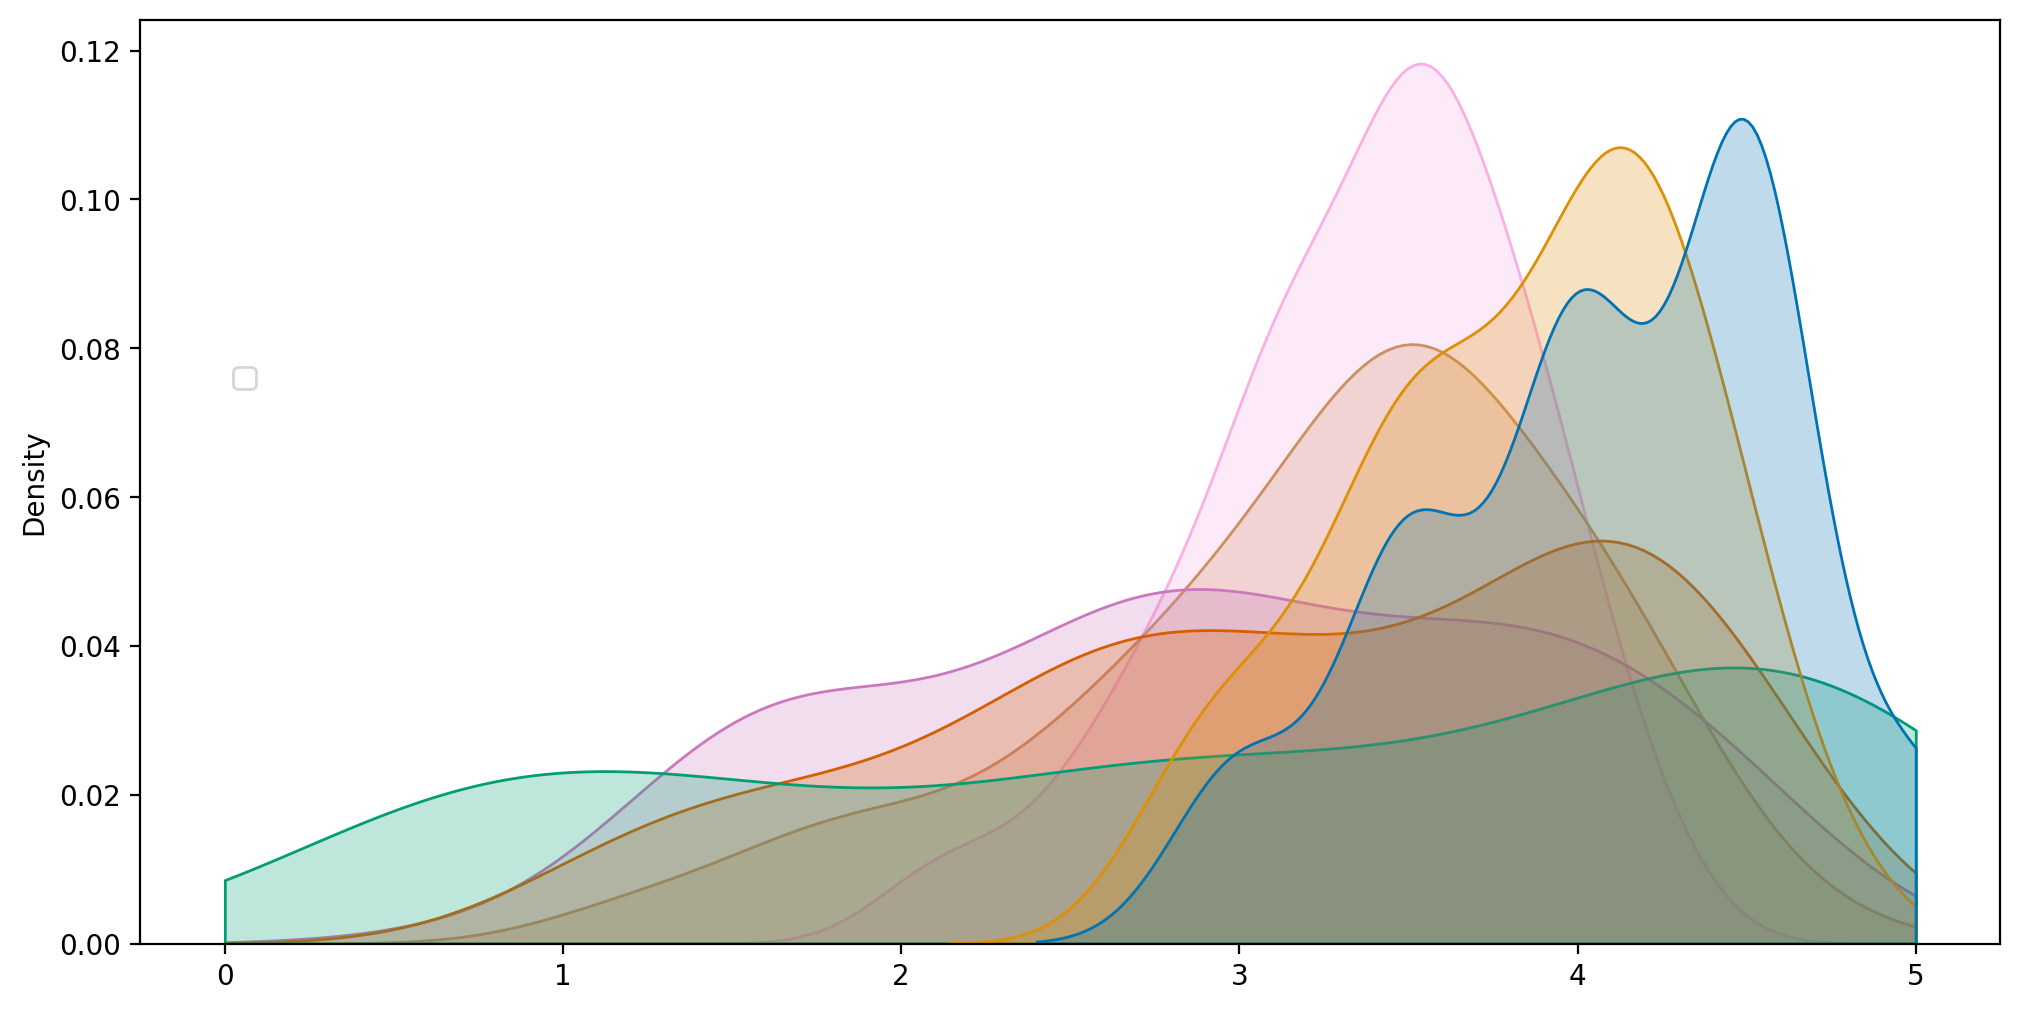

In [66]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.kdeplot(data = norm_scores, clip=[0,5], palette = 'colorblind', fill=True)
plt.legend(loc = (0.05, 0.6))

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

**Нарисуем график KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.**

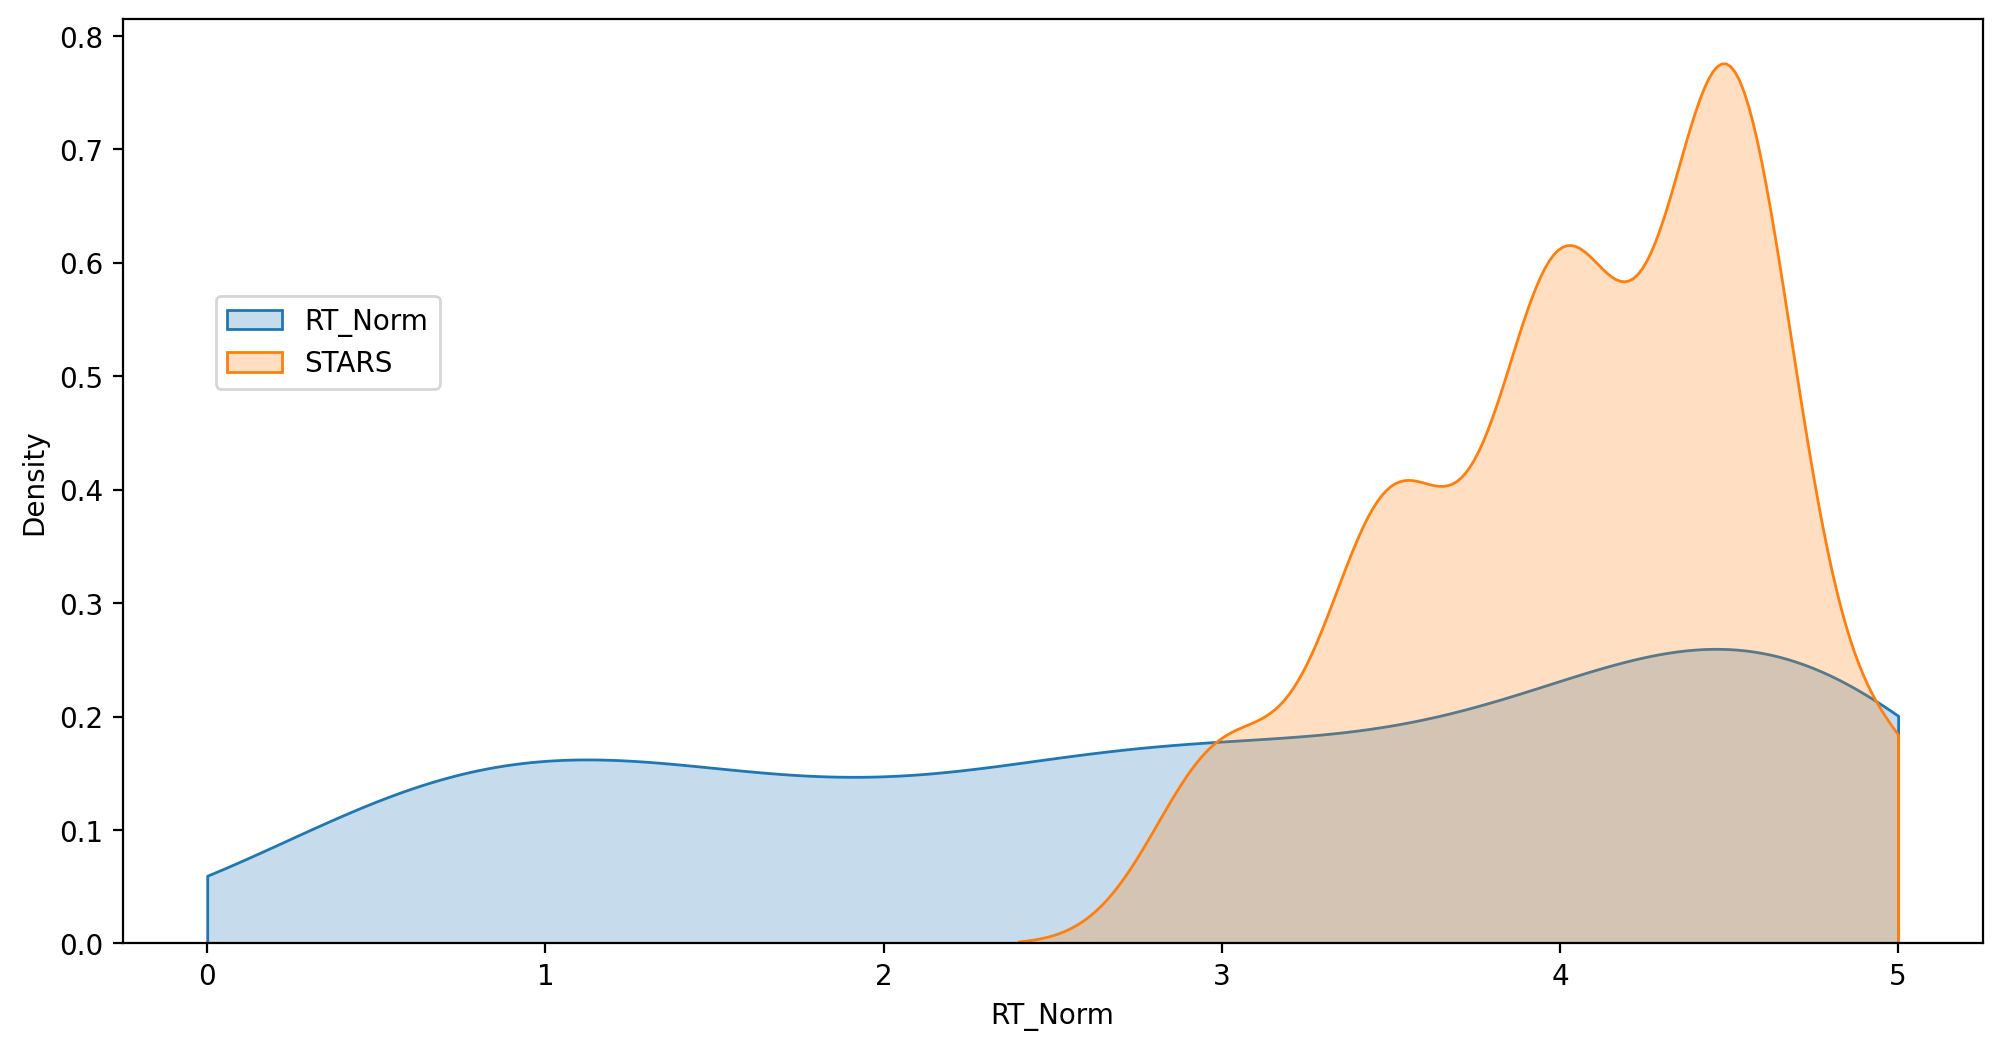

In [67]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.kdeplot(data = norm_scores, x = 'RT_Norm', clip=[0,5], palette = 'crest', fill=True, label = 'RT_Norm')
sns.kdeplot(data = norm_scores, x = 'STARS', clip=[0,5], palette = 'crest', fill=True, label = 'STARS')
plt.legend(loc = (0.05, 0.6))

**Нарисуем график histplot, сравнивающий все нормализованные рейтинги.**

<AxesSubplot:ylabel='Count'>

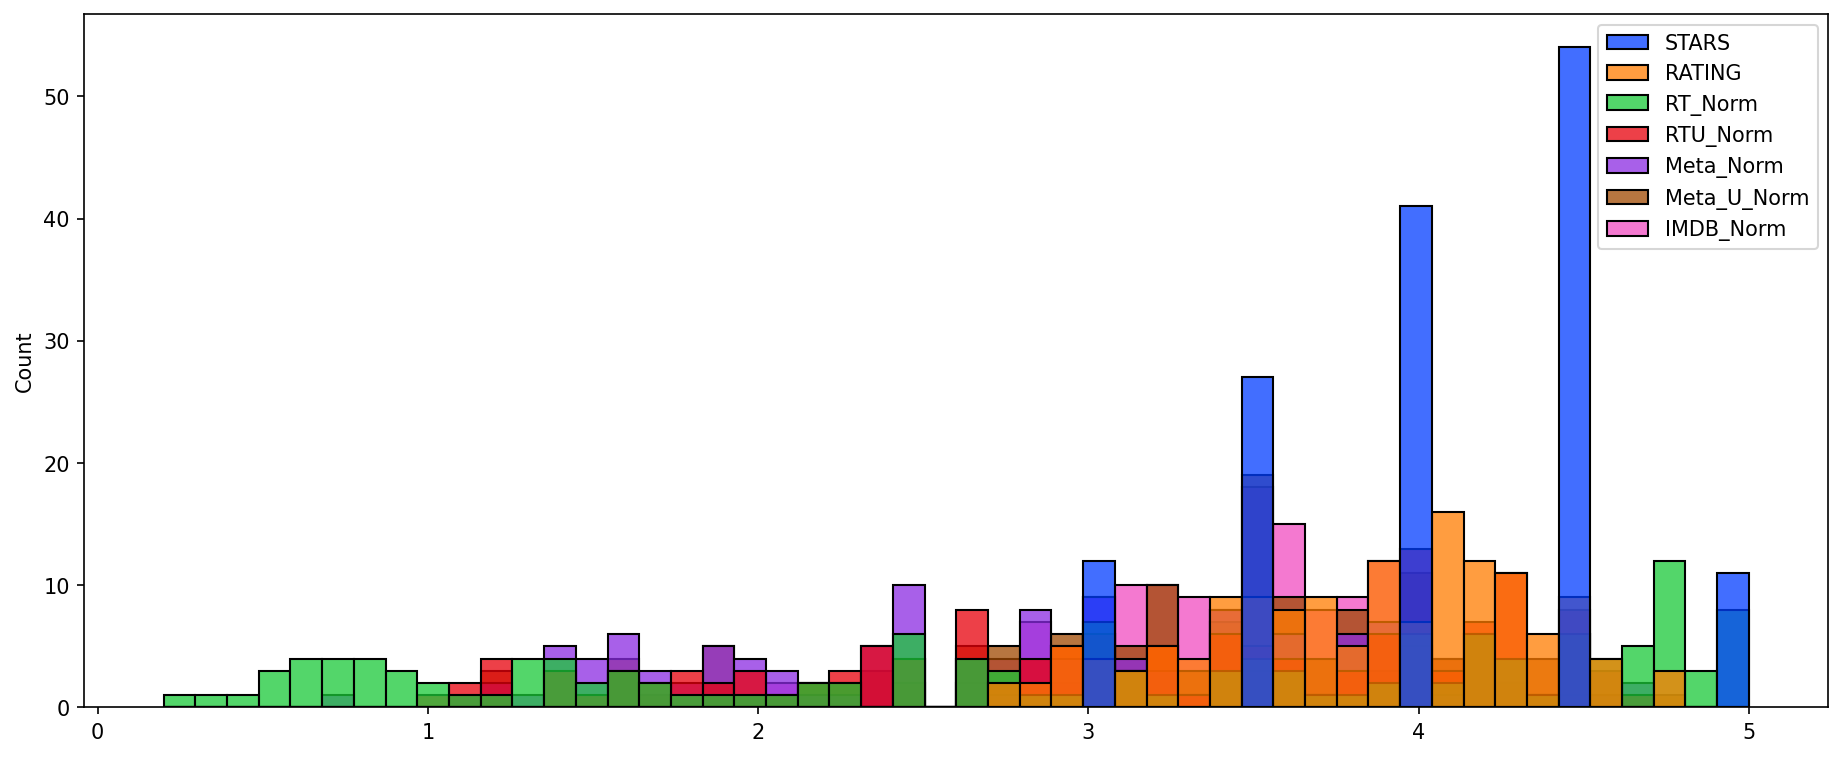

In [68]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50, palette = 'bright')


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**Нарисуйем график clustermap для всех нормализованных рейтингов. Обратим внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры. Замечание: для этого графика clustermap вовсе необязательно указывать колонку FILM в качестве индекса, так что при желании можете удалить эту колонку перед построением графика clustermap.**

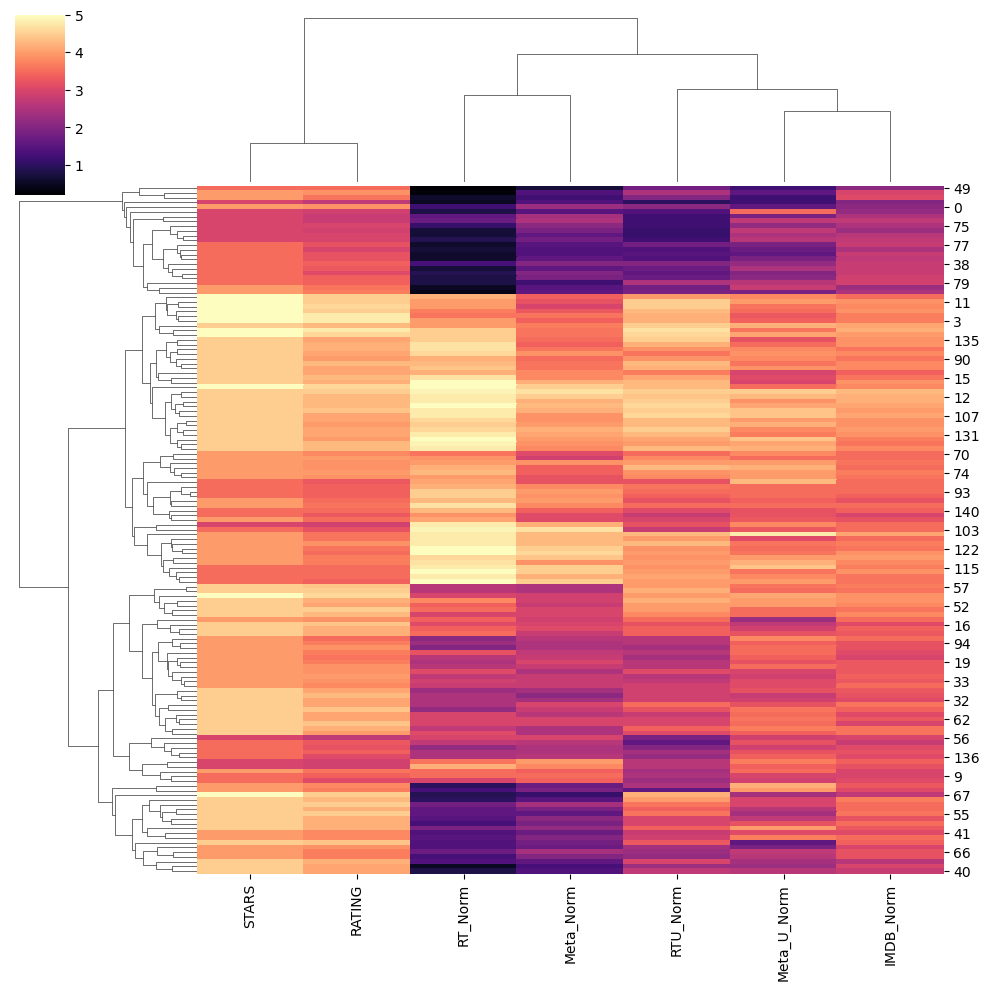

In [69]:
sns.clustermap(data = norm_scores,
               cmap = 'magma')

**Мы заметили, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic. Какие нормализованные рейтинги дали этим фильмам другие компании?**

In [70]:
norm_films = merge_df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm', 'FILM']]
norm_films.nsmallest(10, 'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.7,1.2,2.1,Paul Blart: Mall Cop 2 (2015)
84,4.0,3.9,0.3,2.5,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.9,1.6,1.9,2.5,Hot Pursuit (2015)
25,4.5,4.1,0.5,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.5,1.0,1.4,1.2,2.0,Fantastic Four (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,1.9,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.1,The Loft (2015)


**Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

No handles with labels found to put in legend.


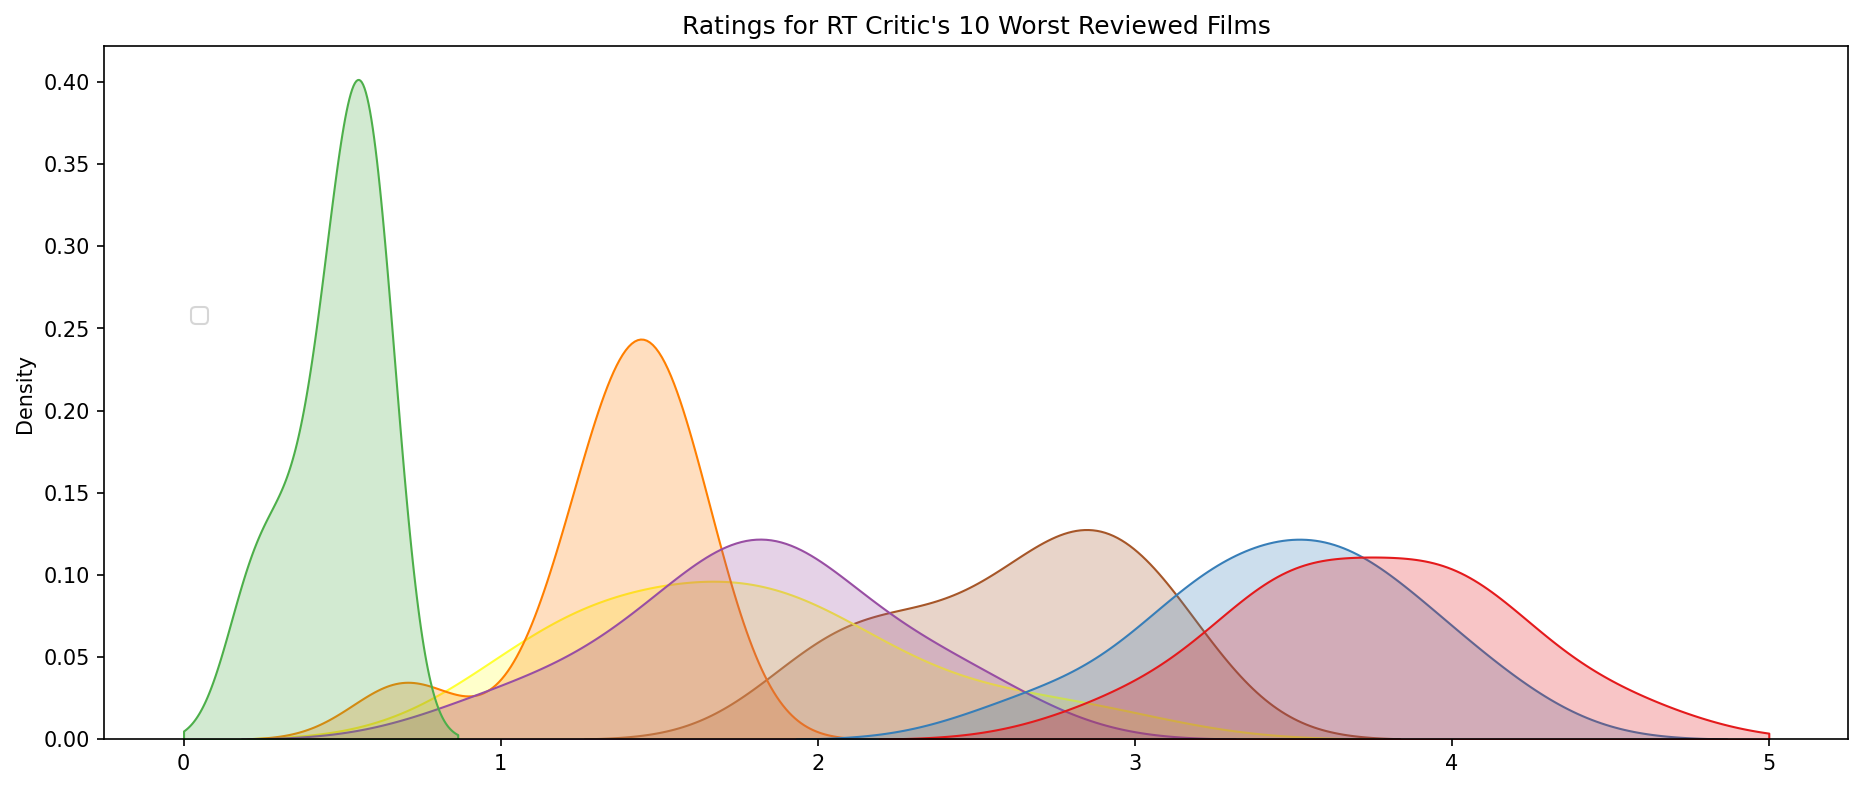

In [71]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5], shade=True, palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")
plt.legend(loc = (0.05, 0.6))

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Вывод: Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [72]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.5
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [73]:
0.4+2.3+1.3+2.3+3

9.3

In [74]:
9.3/5

1.86